**This script loads, cleans and explore salary dataset**

In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Load the data

In [2]:
#Read in files and print the information
train_feature_df=pd.read_csv('train_features.csv')
train_salaries_df=pd.read_csv('train_salaries.csv')

### Examine the data:

In [21]:
train_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_salaries_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


### Use .info() to see the length and dtypes:

In [25]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


### Check for duplicates

In [8]:
train_feature_df.duplicated().sum()

0

In [9]:
train_salaries_df.duplicated().sum()

0

### Merging train_feature and train_salaries as a single dataframe

In [3]:
#Merge the features and salary on job id and deleting original file to save memory.
train_df = pd.merge(train_feature_df,train_salaries_df, on='jobId')

In [5]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Deleting original dataframes (optional)

In [4]:
del train_feature_df

In [5]:
del train_salaries_df

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### Visualize data

#### Creating bins for salary- Low,Medium,High

In [13]:

bins= np.linspace(min(train_df['salary']),max(train_df['salary']),4)
bins


array([  0.        , 100.33333333, 200.66666667, 301.        ])

In [14]:
group_name= ['Low','Medium','High']


In [15]:
train_df['salary_binned'] = pd.cut(train_df['salary'],bins,labels=group_name,include_lowest=True)

In [16]:
train_df[['salary','salary_binned']].head()

,salary,salary_binned
0,130,Medium
1,101,Medium
2,137,Medium
3,142,Medium
4,163,Medium


In [17]:
train_df['salary_binned'].value_counts()

Medium    614255
Low       363608
High       22137
Name: salary_binned, dtype: int64

### Visualize salary bins 

Text(0, 0.5, 'Count')

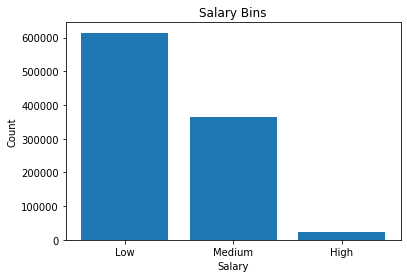

In [18]:
plt.bar(group_name,train_df['salary_binned'].value_counts())
plt.title('Salary Bins')
plt.xlabel('Salary')
plt.ylabel('Count')

### Boxplot and distribution of salary- subplots

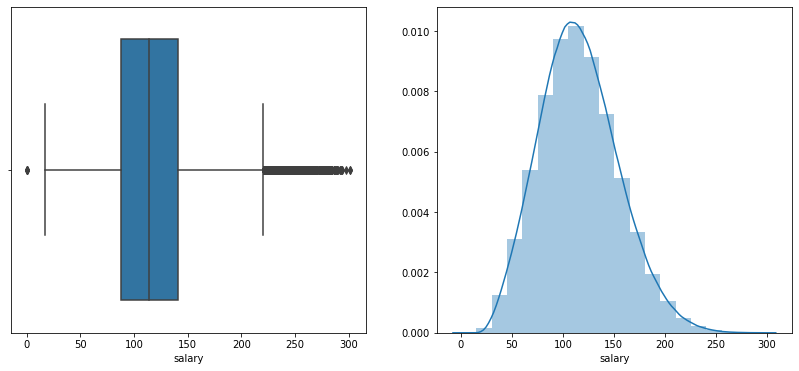

In [28]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df['salary'])
plt.subplot(1,2,2)
sns.distplot(train_df['salary'],bins=20)
plt.show()

### Use IQR Rule to identify potential outliers

In [40]:
stats= train_df['salary'].describe()
print(stats)
IQR = stats['75%'] - stats['25%']
upper = stats['75%']+ 1.5*IQR
lower = stats['25%']-1.5*IQR
print('The upper and lower bound for suspected outliers are',upper,'and',lower)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bound for suspected outliers are 220.5 and 8.5


### Examine Potential Outliers

In [55]:
#check potential outlier below lower bound
train_df[train_df['salary']<8.5]


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,salary_binned
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0,Low
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0,Low
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0,Low
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0,Low
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0,Low


In [63]:
#check potential outlier above upper bound
upper_outlier_df = train_df[train_df['salary']>220.5]
upper_outlier_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,salary_binned
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223,High
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223,High
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248,High
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240,High
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225,High


In [64]:
#Check the jobtypes of upper outliers
upper_outlier_df['jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [17]:
#Check the most suspicious upper outlier
train_df[(train_df.jobType=='JUNIOR') & (train_df.salary >220.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


Here, the upper outliers appear to be legitimate data. The junior positions are in the industries that are well known for high salaries (oil and finance) and most of them having doctoral and masters degree. So we are going to keep it.

In [19]:
#Check the suspicious lower outliers
train_df[train_df.salary <8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


These entries with zero salary does not appear to be like volunteer jobs. We are confident that they are instances of missing/corrupt data and should be removed from the dataset.

In [8]:
#Remove the zero salary entries
train_df = train_df[train_df.salary >8.5]

In [9]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Analyzing individual feature patterns using visualization
**Finding datatypes of each column**



In [21]:
print(train_df.dtypes)

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object


In [22]:
#we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":
train_df.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


#### Categorical  variables
The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text xticklabel objects>)

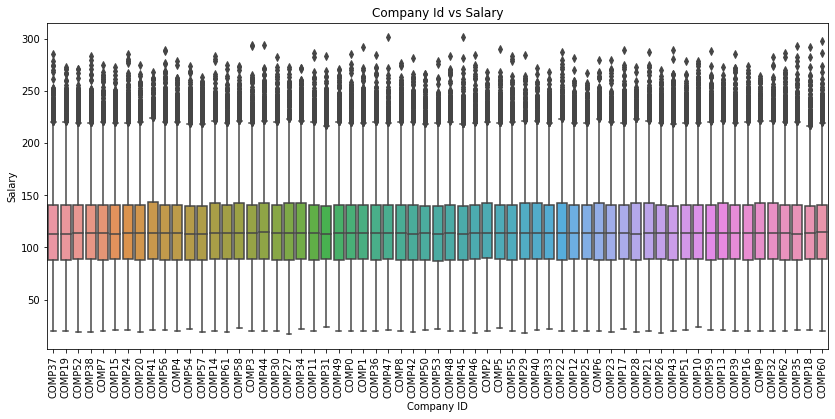

In [10]:
#Boxplot for Companyid and salary
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.companyId, y=train_df.salary)
plt.xlabel('Company ID')
plt.ylabel('Salary')
plt.title('Company Id vs Salary')
plt.xticks(rotation=90)

**Salary is weakly associated with the companies**

Text(0.5, 1.0, 'Salary for different jobtypes')

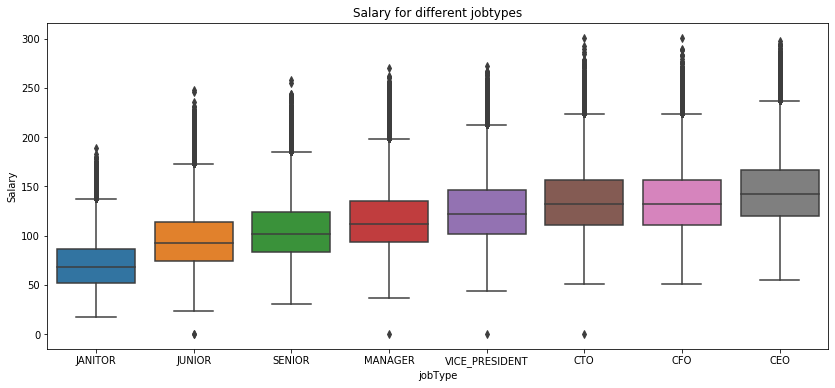

In [18]:
#Boxplot for different jobtypes and their salaries
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.jobType,y=train_df.salary,order=['JANITOR',"JUNIOR","SENIOR",'MANAGER','VICE_PRESIDENT','CTO',"CFO",'CEO'])
plt.xlabel('jobType')
plt.ylabel('Salary')
plt.title('Salary for different jobtypes')

**There is a clear positive correlation between Jobtype and salary.**

Text(0.5, 1.0, 'Salary for different degree')

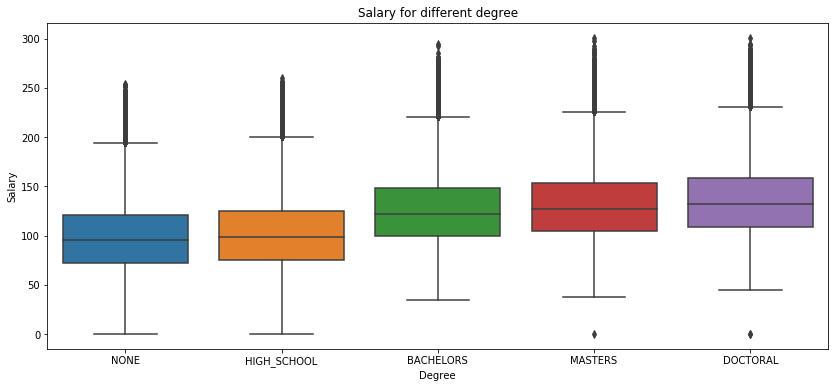

In [17]:
#Boxplots for degree and salary
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.degree, y=train_df.salary,order=('NONE','HIGH_SCHOOL','BACHELORS','MASTERS','DOCTORAL'))
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('Salary for different degree')

**More advanced degree has higher salaries.**

Text(0.5, 1.0, 'Salary for different major')

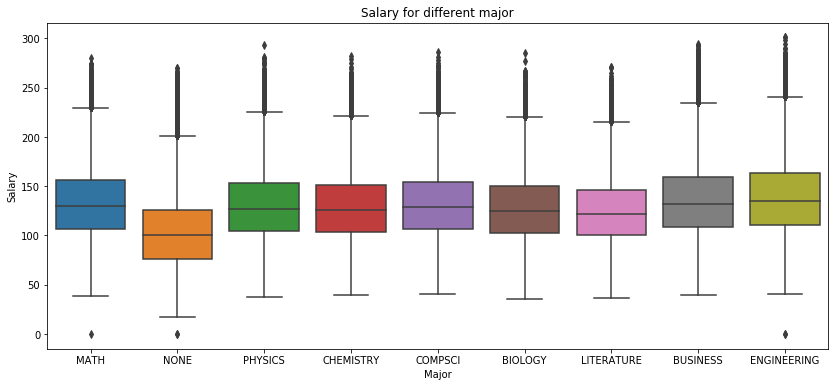

In [21]:
#Boxplots for different major vs Salary
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.major, y=train_df.salary)
plt.xlabel('Major')
plt.ylabel('Salary')
plt.title('Salary for different major')

**People with majors in Business,Engineering and Maths generally has more salary.**

Text(0.5, 1.0, 'Salary for different industries')

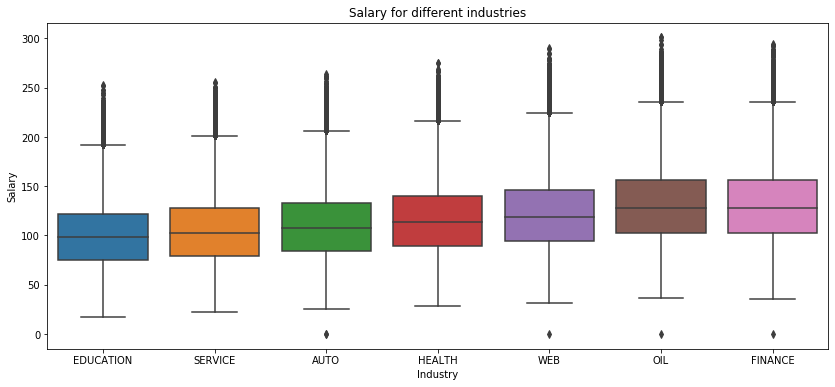

In [36]:
#Boxplot for Industry vs Salary
plt.figure(figsize=(14,6))
sns.boxplot(x=train_df.industry, y=train_df.salary,order=['EDUCATION','SERVICE','AUTO','HEALTH','WEB',"OIL",'FINANCE'])
plt.xlabel('Industry')
plt.ylabel('Salary')
plt.title('Salary for different industries')

**As for industries, Finance,Oil and web industries pay more**

In [8]:
#Correlation between years of Experience and Salary- regression plot
#Grouping by taking mean of salary

group_df = train_df.groupby('salary',as_index=False).mean()

group_df.head()


,salary,yearsExperience,milesFromMetropolis
0,0,7.800000,25.400000
1,17,0.000000,98.000000
2,18,0.333333,93.333333
3,19,0.300000,88.800000
4,20,0.674419,90.906977


Text(0.5, 1.0, 'Experience vs Salary')

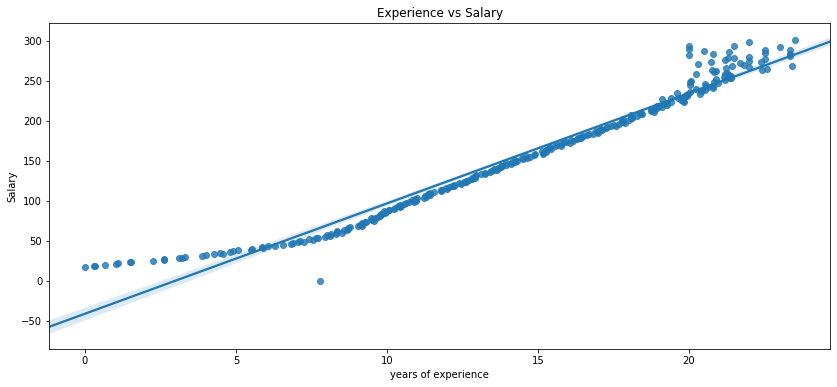

In [9]:
#Regression plot

plt.figure(figsize=(14,6))
sns.regplot(x= group_df.yearsExperience, y=group_df.salary)
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

In [23]:
train_df[['yearsExperience','salary']].corr()

,yearsExperience,salary
yearsExperience,1.000000,0.375013
salary,0.375013,1.000000


**In general there is a clear positive correlation between salary and years of experience**

Text(0.5, 1.0, 'Miles from Metropolis vs Salary')

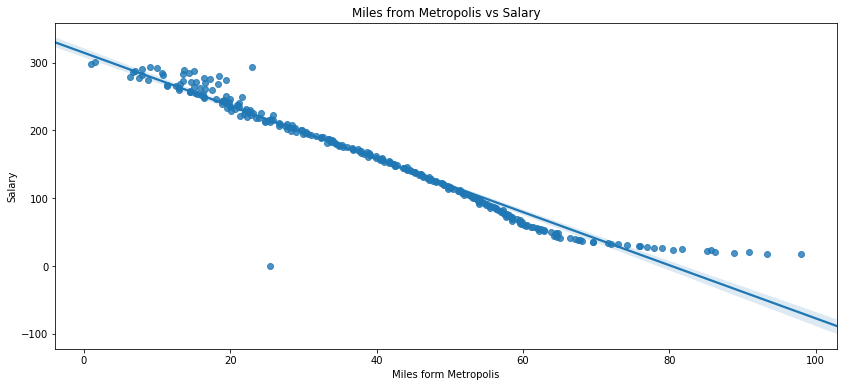

In [10]:
#Correlation between salary and distance from metropolis

plt.figure(figsize=(14,6))
sns.regplot(x=group_df.milesFromMetropolis, y=group_df.salary)
plt.xlabel('Miles form Metropolis')
plt.ylabel('Salary')
plt.title('Miles from Metropolis vs Salary')


In [24]:
train_df[['milesFromMetropolis','salary']].corr()

,milesFromMetropolis,salary
milesFromMetropolis,1.000000,-0.297666
salary,-0.297666,1.000000


**In general salary decreases when the distance from metropolis increases ie a  negative correlation**

### Descriptive statistical analysis

In [11]:
train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [14]:
#We can apply the method "describe" on the variables of type 'object' 
train_df.describe(include='object')

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684653208,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


**Value_counts**

Value-counts is a good way of understanding how many units of each characteristic/variable we have. But only works on series not dataframes


In [31]:
#Unique jobtypes
train_df['jobType'].unique()


array(['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR',
       'CTO', 'SENIOR'], dtype=object)

In [32]:
#Count of each jobtypes
train_df['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64

In [16]:
train_df['degree'].value_counts()

HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64

In [18]:
train_df['major'].value_counts()

NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64

In [19]:
train_df['industry'].value_counts()

WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [38]:
#The average salary for each degree in different industries

#Grouping by degree and industry
group1_df = train_df[['degree','industry','salary']]
group1_df =group1_df.groupby(by=['degree','industry'],as_index=False).mean()

# Converting it into pivot table
group1_pivot_df = group1_df.pivot(index='degree',columns='industry')
group1_pivot_df

salary                                                  \
industry           AUTO   EDUCATION     FINANCE      HEALTH         OIL   
degree                                                                    
BACHELORS    118.234848  107.975063  140.375583  125.444964  140.997392   
DOCTORAL     128.074435  118.323663  150.641405  135.117068  150.744987   
HIGH_SCHOOL   95.808696   86.298461  116.183275  101.549296  116.307842   
MASTERS      123.239183  113.140163  145.283442  130.545277  145.605445   
NONE          92.340695   82.281235  112.638157   97.286797  112.649746   

                                     
industry        SERVICE         WEB  
degree                               
BACHELORS    113.233762  132.100092  
DOCTORAL     123.018179  142.313758  
HIGH_SCHOOL   91.241363  105.994693  
MASTERS      118.299083  137.241080  
NONE          87.404719  102.748705

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

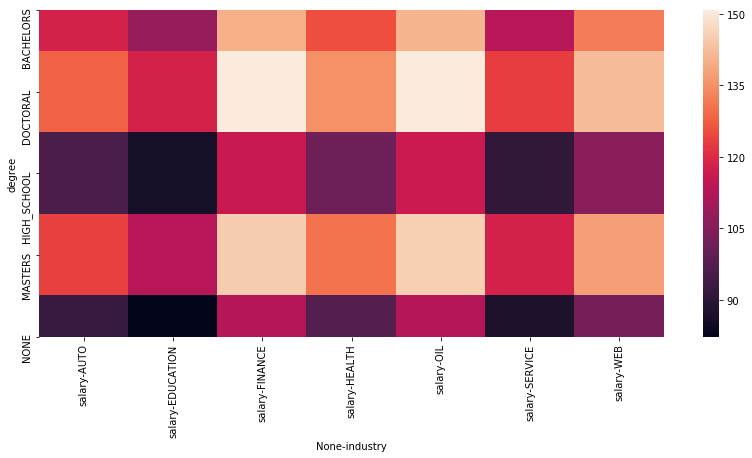

In [47]:
#Heatmap to visualise how the salary is related to degree and industry

plt.figure(figsize=(14,6))
sns.heatmap(group1_pivot_df)
plt.xticks(rotation=90)



**In general people with doctoral degrees in Oil and Finance industries are getting paid more**